In [ ]:
#pip install pygraphviz
# https://pygraphviz.github.io/documentation/stable/install.html

In [3]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from operator import itemgetter
#import pygraphviz

In [4]:
os.getcwd()

'/Users/leonidgavrilyuk/Desktop/Semester_3/AMS'

## Load 2014 data

In [5]:
df2014 = pd.read_excel('/Users/leonidgavrilyuk/Desktop/Semester_3/AMS/European_electricity_network_vFinal.xlsx', sheet_name='2014')
df2014.head()

,Origin_Country,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,Albania,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,0.0
1,Austria,AT,0.0,NaN,0.0,0.0,0.0,5821,263.0,5484.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3119.0,0.0,0.0
2,Bosnia and Herzegovina,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,614.0,0.0,0.0,0.0,0.0
3,Belgium,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,...,3040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bulgaria,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,1514.0,0.0,0.0,0.0,5296.0


In [6]:
df_elec2014 = df2014.drop(['Origin_Country'], axis=1)
df_elec2014.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,5821,263.0,5484.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3119.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,614.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,...,3040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,1514.0,0.0,0.0,0.0,5296.0


## Sort and clean up 2014 data

In [7]:
# Convert the wide table to long table
Country_list = list(df_elec2014.columns)
df_elec2014 = df_elec2014.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec2014.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec2014.head()

,Origin,Destination,Electricity_Flow
0,AL,AL,NaN
1,AT,AL,0.0
2,BA,AL,0.0
3,BE,AL,0.0
4,BG,AL,0.0


In [8]:
# Sort the table based on origin country's name
df_elec2014.sort_values('Origin', inplace=True, ascending=True)
#df_elec2014.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec2014.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec2014 = df_elec2014[df_elec2014.Electricity_Flow != 0]
df_elec2014.head()

,Origin,Destination,Electricity_Flow
476,AL,GR,104.0
748,AL,ME,145.0
986,AL,RS,165.0
1055,AT,SI,3119.0
239,AT,DE,5484.0


In [9]:
#df_elec2014.to_csv ('df_elec2014.csv', index = False, header=True)

In [10]:
G2014 = nx.from_pandas_edgelist(df_elec2014, 
                                'Origin', 
                                'Destination', 
                                create_using = nx.DiGraph)

In [11]:
G2014.number_of_nodes()

34

In [12]:
G2014.number_of_edges()

119

In [13]:
sorted(G2014.nodes())

['AL',
 'AT',
 'BA',
 'BE',
 'BG',
 'CH',
 'CZ',
 'DE',
 'DK',
 'EE',
 'ES',
 'FI',
 'FR',
 'GB',
 'GR',
 'HR',
 'HU',
 'IE',
 'IT',
 'LT',
 'LU',
 'LV',
 'ME',
 'MK',
 'NL',
 'NO',
 'PL',
 'PT',
 'RO',
 'RS',
 'SE',
 'SI',
 'SK',
 'TR']

In [14]:
G2014.edges()

OutEdgeView([('AL', 'GR'), ('AL', 'ME'), ('AL', 'RS'), ('GR', 'MK'), ('GR', 'IT'), ('GR', 'AL'), ('GR', 'TR'), ('ME', 'BA'), ('ME', 'AL'), ('ME', 'RS'), ('RS', 'MK'), ('RS', 'BA'), ('RS', 'BG'), ('RS', 'AL'), ('RS', 'HR'), ('RS', 'RO'), ('RS', 'ME'), ('RS', 'HU'), ('AT', 'SI'), ('AT', 'DE'), ('AT', 'CH'), ('AT', 'IT'), ('AT', 'CZ'), ('AT', 'HU'), ('SI', 'IT'), ('SI', 'AT'), ('SI', 'HR'), ('DE', 'SE'), ('DE', 'DK'), ('DE', 'AT'), ('DE', 'NL'), ('DE', 'CZ'), ('DE', 'PL'), ('DE', 'CH'), ('DE', 'FR'), ('CH', 'AT'), ('CH', 'IT'), ('CH', 'DE'), ('CH', 'FR'), ('IT', 'AT'), ('IT', 'CH'), ('IT', 'FR'), ('IT', 'SI'), ('IT', 'GR'), ('CZ', 'SK'), ('CZ', 'DE'), ('CZ', 'PL'), ('CZ', 'AT'), ('HU', 'RO'), ('HU', 'RS'), ('HU', 'HR'), ('HU', 'AT'), ('BA', 'RS'), ('BA', 'HR'), ('BA', 'ME'), ('HR', 'SI'), ('HR', 'HU'), ('HR', 'BA'), ('HR', 'RS'), ('BE', 'FR'), ('BE', 'LU'), ('BE', 'NL'), ('FR', 'GB'), ('FR', 'LU'), ('FR', 'IT'), ('FR', 'BE'), ('FR', 'DE'), ('FR', 'ES'), ('FR', 'CH'), ('LU', 'BE'), ('NL', 

In [15]:
print(nx.info(G2014))

Name: 
Type: DiGraph
Number of nodes: 34
Number of edges: 119
Average in degree:   3.5000
Average out degree:   3.5000


In [16]:
totexp = df_elec2014.groupby(['Origin'], as_index=False).sum()
totexp_dict = pd.Series(totexp.Electricity_Flow.values,index=totexp.Origin).to_dict()
#totexp.set_index('Origin')
#totexp.to_dict()

In [17]:
nx.set_node_attributes(G2014, totexp_dict, 'totexp')
totexp = nx.get_node_attributes(G2014, 'totexp')
totexp

{'AL': 414.0,
 'GR': 684.0,
 'ME': 3640.0,
 'RS': 5049.0,
 'AT': 18791.0,
 'SI': 9962.0,
 'DE': 68884.0,
 'CH': 32439.0,
 'IT': 3008.0,
 'CZ': 28138.0,
 'HU': 5683.0,
 'BA': 5998.0,
 'HR': 6644.0,
 'BE': 4190.0,
 'FR': 73575.0,
 'LU': 994.0,
 'NL': 17899.0,
 'BG': 13774.0,
 'RO': 8356.0,
 'TR': 1977.0,
 'MK': 2637.0,
 'SK': 9421.0,
 'PL': 11341.0,
 'SE': 32348.0,
 'DK': 9801.0,
 'NO': 20879.0,
 'EE': 3848.0,
 'LV': 3022.0,
 'FI': 3858.0,
 'ES': 9642.0,
 'PT': 6343.0,
 'GB': 3704.0,
 'IE': 239.0,
 'LT': 244.0}

In [18]:
node_sizes = [0.08*(d-1) for d in totexp.values()]

In [19]:
nx.get_node_attributes(G2014,'Origin')

{}

In [20]:
coords = nx.spring_layout(G2014, scale=3, k=0.5, seed = 123)

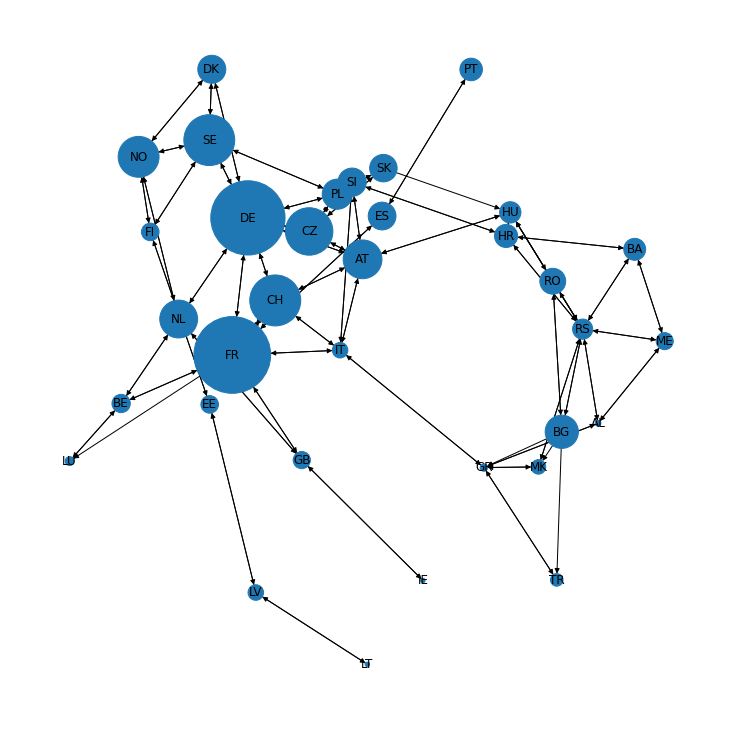

In [21]:
plt.figure(figsize=(10,10))
nx.draw(G2014,
        pos = coords,
        node_size = node_sizes,
        with_labels = True)
#plt.savefig('Figure_exercise.pdf')

In [151]:
density = nx.density(G2014)
density

0.10606060606060606

In [220]:
edges_from_nx = G2014.edges()
len(edges_from_nx)

119

In [201]:
#pip install python-igraph

     |████████████████████████████████| 2.0 MB 3.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [241]:
import igraph as ig
import pylab as plt

In [242]:
#bpip install pycairo

In [2]:
pip install pycairo

  Using cached pycairo-1.20.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycairo: filename=pycairo-1.20.0-cp38-cp38-macosx_10_9_x86_64.whl size=90588 sha256=08e4c1af0286be93db421e0a10669b4fed0d0beedd86f9deec7856e1ad79e79d
  Stored in directory: /Users/leonidgavrilyuk/Library/Caches/pip/wheels/7c/6f/b3/3181c06d04ed8f428f86797384f5b4c9932692b9526b6aba21
Successfully built pycairo
Note: you may need to restart the kernel to use updated packages.


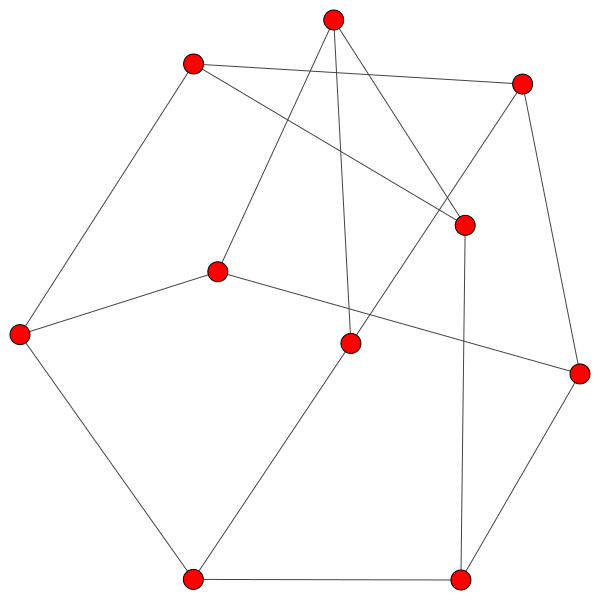

In [22]:
import igraph as ig
g = ig.Graph.Famous("petersen")
ig.plot(g)

In [89]:
vertex_sizes = [0.00095*(d-1) for d in totexp.values()]

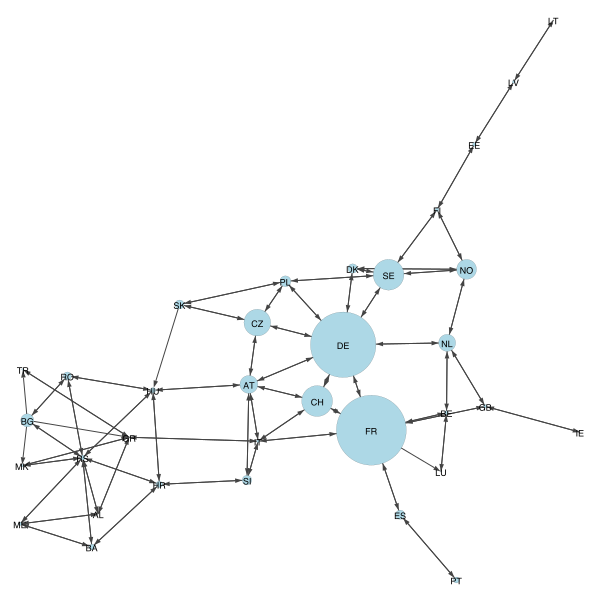

In [123]:
g = ig.Graph.from_networkx(G2014)
layout1 = g.layout_kamada_kawai()
layout2 = g.layout_fruchterman_reingold()
layout3 = g.layout_lgl()
ig.plot(g, 
        layout = layout1,
        vertex_label = G2014.nodes(), 
        #vertex_size = vertex_sizes,
        vertex_color = 'lightblue', 
        vertex_label_dist = 0,
        vertex_frame_width = 0.1,
        vertex_label_size = 9,
        edge_arrow_size = 0.5,
        edge_curved = False,
        directed=True)

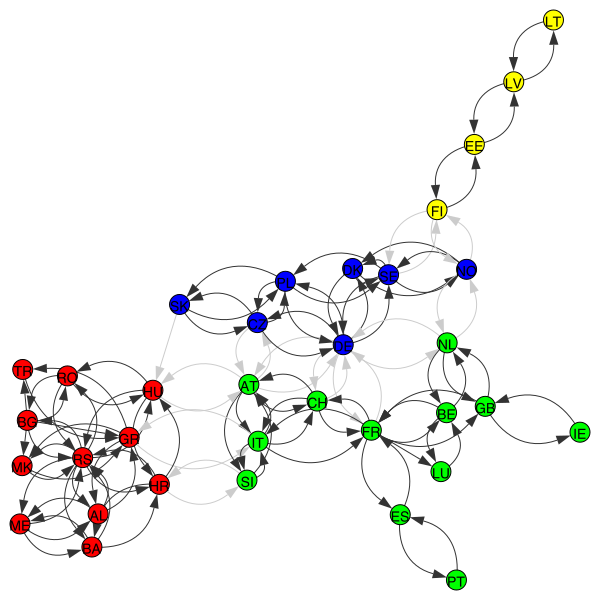

In [139]:
dendrogram = g.community_edge_betweenness()
ig.plot(dendrogram)
clusters = dendrogram.as_clustering()
ig.plot(clusters, vertex_label = G2014.nodes())

In [ ]:
#plt.savefig('nx_graph1.png')

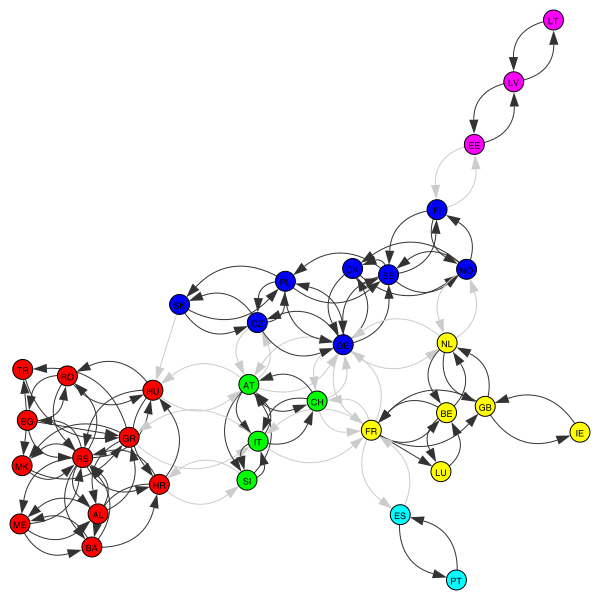

In [149]:
community = g.community_infomap()
ig.plot(community, 
        vertex_label = G2014.nodes(),
        vertex_label_size = 9,
        vertex_label_color = 'black',
       )

In [150]:
plt.savefig('Figure_exercise.pdf')

<Figure size 432x288 with 0 Axes>

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G2018)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)
color_map = []
for node in G2018:
    if node in node_groups[0]:
        color_map.append('lightblue')
    elif node in node_groups[1]:
        color_map.append('lightgreen')
    elif node in node_groups[2]:
        color_map.append('yellow')
    elif node in node_groups[3]:
        color_map.append('lightpink')
plt.figure(figsize=(8,6))
nx.draw(G2018, node_color=color_map, edge_color='gray', style = "solid", width=1, with_labels=True)
plt.show()

- Betweenness centrality

Betweenness centrality quantifies the number of times a node acts as bridge along the shortest path between two other nodes. It is basically a measure of connectedness between components of the graph.

- Degree centrality

The centrality for a node measures its relative importance within the graph. The degree centrality for a node (n) is the number of nodes it is connected. The degree centrality values are normalized by the maximum degree in the graph. 

- Adjacency Matrix

The adjacency matrix is a N x N matrix where the cells constitute edges. In this example the fields are coloured according the degree centrality and as the graph is directed, the matrix is not symmetric.

In [ ]:
class graphStats:
    """
    calculte the degree centrality and betweenness centrality
    """
    
    def calculate_degree_centrality(self, graph):
        dgc_key = []
        dgc_value = []
        g = graph

        dc = nx.degree_centrality(g)
        nx.set_node_attributes(g, dc, 'degree_cent')

        from operator import itemgetter
        degcent_sorted = sorted(dc.items(), key=itemgetter(1), reverse=True)

        for key, value in degcent_sorted:
            dgc_key.append(str(key))
            dgc_value.append(value)

        return dgc_key, dgc_value
    

    def calculate_betweenness_centrality(self, graph):
        btc_key = []
        btc_value = []
        g = graph

        bc = nx.betweenness_centrality(g)

        betcent_sorted = sorted(bc.items(), key=itemgetter(1), reverse=True)

        for key, value in betcent_sorted:
            btc_key.append(str(key))
            btc_value.append(value)

        return btc_key, btc_value

In [ ]:
stats = graphStats()
betc_key, betc_value = stats.calculate_betweenness_centrality(G)
degc_key, degc_value = stats.calculate_degree_centrality(G)

In [ ]:
N = G.order()
K = G.size()
avg_d = float(N)/K
avg_degree = 'Average degree: %.4f' % (avg_d)

In [ ]:
avg_d

In [ ]:
avg_degree

In [ ]:
# plot Degree centrality
plt.figure()

ax1 = plt.subplots(figsize=(10,8))
plt.title('Degree centrality for nodes', fontsize=12)
a_lenght = np.arange(len(degc_value))
plt.bar(a_lenght, degc_key, color=cm.jet(degc_value), align='center')
plt.xticks(a_lenght, degc_key, size='small', rotation='vertical')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=8)
plt.autoscale(enable=True, axis='both', tight=None)

In [ ]:
# Plot: Betweenness_centrality
plt.figure()

ax1 = plt.subplots(figsize=(10,6))

plt.title('Betweenness centrality for nodes', fontsize=12)
a_lenght = np.arange(len(betc_value))
plt.bar(a_lenght, betc_value, color=cm.jet(betc_value), align='center')
plt.xticks(a_lenght, betc_key, size='small', rotation='vertical')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=8)
plt.autoscale(enable=True, axis='both', tight=None)
plt.ylim(0, max(betc_value) * 1.1)
plt.plot(betc_value, '--b')